In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving fakenewskdd2020.zip to fakenewskdd2020.zip


In [ ]:
!pip install pandas numpy  

# The problem
How can we automatically detect fake news?

Reference Kaggle Competition : https://www.kaggle.com/c/fakenewskdd2020/overview

## Approach 1 - Look up

Cross-reference : Reference some legitimate site, corroborate information

Suppose we don't have any means of checking - can we still figure something out?

## Approach 2 - Analytical

Hypothesis : there is some intrinsic property about fake news that makes it different from normal news.

* Words/phrases used might be different
  * fake news generally has a subversive purpose 
  * Might generally contain more intense words/sentiments
* Sentiment/intensity of the text might be different
  * fakenews is intended to enrage/incite something
  
Lets dive a bit deeper into this



In [2]:
# Unzip the data
!unzip fakenewskdd2020.zip

Archive:  fakenewskdd2020.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
# Load the data
import pandas as pd

# Load the dataset (here we only use train)
data = pd.read_csv("train.csv", sep='\t',encoding="utf-8")

In [4]:
# view the data
data

text label
0     Get the latest from TODAY Sign up for our news...     1
1     2d  Conan On The Funeral Trump Will Be Invited...     1
2     It’s safe to say that Instagram Stories has fa...     0
3     Much like a certain Amazon goddess with a lass...     0
4     At a time when the perfect outfit is just one ...     0
...                                                 ...   ...
4982  The storybook romance of WWE stars John Cena a...     0
4983  The actor told friends he’s responsible for en...     0
4984  Sarah Hyland is getting real.  The Modern Fami...     0
4985  Production has been suspended on the sixth and...     0
4986  A jury ruled against Bill Cosby in his sexual ...     0

[4987 rows x 2 columns]

### More complex data exploration - typically I like to understand my data a bit more - pandas-profiling library is great with that
* It runs automated data profiling on a pandas dataframe so you get really good first cut analytics quickly
* also - tons of other python libraries out there to speed up your work

In [ ]:
!pip install pandas-profiling==2.9.0

     |████████████████████████████████| 266kB 3.9MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 1.1MB 5.1MB/s 
     |████████████████████████████████| 71kB 4.7MB/s 
     |████████████████████████████████| 3.1MB 9.7MB/s 
     |████████████████████████████████| 819kB 28.8MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=b3478a77b2046a1e331447c1616e198bd0596ae40c505cdbaefaaf2f72c3de3c
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=2eed66b675fbc3d2f73451fc7caec520e3a6ea470e736ada9977587f5a5a21d0
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=78f7ac819c38cd033830e288f3f29e20d74387d34158ba472b210a056

In [ ]:
# profile the data using pandas_profiling
from pandas_profiling import ProfileReport

ProfileReport(data,explorative=True)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# a simple test our first hypothesis - are the words different?
# split the data
fake_news = data[data["label"]=="1"]
real_news = data[data["label"]=="0"]

In [7]:
real_news

text label
2     It’s safe to say that Instagram Stories has fa...     0
3     Much like a certain Amazon goddess with a lass...     0
4     At a time when the perfect outfit is just one ...     0
5     When Reese Witherspoon was 17, she had already...     0
6     It’s official! WAGS Miami stars Ashley Nicole ...     0
...                                                 ...   ...
4982  The storybook romance of WWE stars John Cena a...     0
4983  The actor told friends he’s responsible for en...     0
4984  Sarah Hyland is getting real.  The Modern Fami...     0
4985  Production has been suspended on the sixth and...     0
4986  A jury ruled against Bill Cosby in his sexual ...     0

[2972 rows x 2 columns]

In [9]:
# check fake news
from collections import Counter
agg_fake = " ".join(fake_news["text"]).split()
agg_real = " ".join(real_news["text"]).split()

In [23]:
agg_fake[:10]

['Get',
 'the',
 'latest',
 'from',
 'TODAY',
 'Sign',
 'up',
 'for',
 'our',
 'newsletter']

In [12]:
fake = Counter(agg_fake)
real = Counter(agg_real)

In [14]:
real

Counter({'It’s': 593,
         'safe': 146,
         'to': 49076,
         'say': 1038,
         'that': 21793,
         'Instagram': 848,
         'Stories': 52,
         'has': 6251,
         'far': 281,
         'surpassed': 15,
         'its': 1542,
         'competitor': 5,
         'Snapchat': 85,
         'in': 33941,
         'popularity': 36,
         'since': 1144,
         'it’s': 1119,
         'inception': 6,
         'two': 2450,
         'years': 1474,
         'ago—and': 1,
         'your': 2367,
         'favorite': 236,
         'celebrities': 126,
         'have': 8488,
         'hopped': 13,
         'on': 18083,
         'the': 83651,
         'social': 621,
         'media': 661,
         'trend.': 4,
         'Unlike': 36,
         'a': 40339,
         'highly': 78,
         'curated': 12,
         'photo': 560,
         'feed,': 2,
         'is': 14995,
         'where': 1697,
         'seem': 201,
         'be': 7787,
         'comfortable': 83,
         'enoug

In [ ]:
import matplotlib.pyplot as plt

In [16]:
real.most_common(30)

[('the', 83651),
 ('to', 49076),
 ('and', 48448),
 ('a', 40339),
 ('of', 40209),
 ('in', 33941),
 ('that', 21793),
 ('on', 18083),
 ('for', 17842),
 ('was', 16280),
 ('with', 15624),
 ('is', 14995),
 ('her', 13303),
 ('I', 13236),
 ('The', 13110),
 ('as', 10240),
 ('at', 9860),
 ('she', 9461),
 ('have', 8488),
 ('it', 8254),
 ('his', 8236),
 ('he', 7975),
 ('be', 7787),
 ('you', 7059),
 ('by', 7038),
 ('from', 6933),
 ('this', 6253),
 ('has', 6251),
 ('an', 6029),
 ('not', 6021)]

In [15]:
fake.most_common(30)

[('the', 55351),
 ('and', 32832),
 ('to', 31185),
 ('a', 27861),
 ('of', 25887),
 ('in', 23664),
 ('that', 13002),
 ('her', 12390),
 ('for', 12306),
 ('on', 11883),
 ('was', 11865),
 ('with', 11239),
 ('is', 10372),
 ('The', 9270),
 ('she', 8154),
 ('as', 7325),
 ('at', 6624),
 ('his', 6245),
 ('I', 6079),
 ('he', 5517),
 ('by', 5258),
 ('has', 5256),
 ('it', 4956),
 ('be', 4807),
 ('have', 4736),
 ('from', 4694),
 ('an', 4507),
 ('their', 4356),
 ('In', 3841),
 ('about', 3837)]

In [17]:
# found something useful already - lots of useless words. Lets get rid of them
# Aside - stopwords -> https://en.wikipedia.org/wiki/Stop_word
import nltk #Import NLTK ---> Natural Language Toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
sw = set(nltk.corpus.stopwords.words('english'))

In [21]:
fake = Counter(filter(lambda x: x.lower() not in sw,agg_fake))
real = Counter(filter(lambda x: x.lower() not in sw,agg_real))

In [24]:
real.most_common(30)

[('also', 3818),
 ('one', 3715),
 ('—', 3327),
 ('first', 3317),
 ('said', 3297),
 ('would', 3219),
 ('like', 2989),
 ('people', 2487),
 ('two', 2450),
 ('going', 2450),
 ('time', 2355),
 ('get', 2294),
 ('new', 2217),
 ('think', 2106),
 ('--', 1984),
 ('told', 1907),
 ('show', 1885),
 ('New', 1861),
 ('know', 1847),
 ('back', 1822),
 ('made', 1696),
 ('want', 1663),
 ('-', 1606),
 ('make', 1598),
 ('last', 1560),
 ('really', 1518),
 ('years', 1474),
 ('got', 1462),
 ('season', 1428),
 ('–', 1398)]

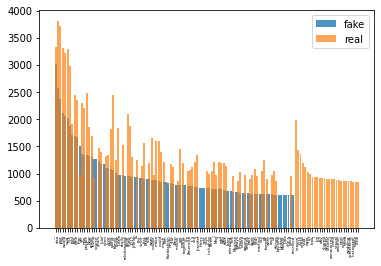

In [26]:
# Visualise similar words - copy
import matplotlib.pyplot as plt 
plt.bar([i[0] for i in fake.most_common(100)],height=[i[1] for i in fake.most_common(100)],alpha=0.8,label="fake")
plt.bar([i[0] for i in real.most_common(100)],height=[i[1] for i in real.most_common(100)],alpha=0.7,label="real")
plt.xticks(size=4,rotation=90)
plt.legend()
plt.show()

# Some common words, but quite a few different too. Lets start trying to do some classification

In [27]:
# just a look at our classification variable
data["label"][:10]

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: label, dtype: object

In [28]:
# label is a object, lets convert it into a number so numerical ops work
data = data[data["label"]!="label"].copy() # pandas-profiling
data["label"] = data["label"].astype(int)

In [29]:
data["label"]

0       1
1       1
2       0
3       0
4       0
       ..
4982    0
4983    0
4984    0
4985    0
4986    0
Name: label, Length: 4986, dtype: int64

## Before we start - a useful tip
for any classification problem, the simplest thing a classifier can do is predict all of one class. If your classes are imbalanced (90% of class 0, 10% of class 1), then the model can get 90% accuracy easily by just predicting all of class 0. Lets calculate the baseline first and see how skewed our data is

In [30]:
# calculate baselise stats
print("% fake :", data["label"].mean())
print("% real :",1 - data["label"].mean())


% fake : 0.40393100681909344
% real : 0.5960689931809066


# the simplest model will get 59% accuracy - lets start classifying!

# Define some useful functions first

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

def compute_metrics(data, y_true, model_obj):

    # Make predictions
    y_pred = model_obj.predict(data)

    # Compute accuracy
    acc = accuracy_score(y_true = y_true, y_pred = y_pred)

    # Make DataFrame
    metrics = pd.DataFrame(data = np.array([acc]), columns=['Accuracy Score'])
    
    print(classification_report(y_true = y_true, y_pred = y_pred))
    
    return metrics


def train_model_get_score(data, preprocess, model, metrics):
    preprocessed_data, vectorizer = preprocess(data)
    
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, data["label"], test_size=0.2, random_state = 42)

    # fit the model
    model.fit(X_train, y_train)

    # Compute the Logistic Regression Metrics
    model_metrics =  metrics(X_test, y_test, model)

    return model, model_metrics, vectorizer



Our first model - lets just count all the words, and put it into a random forest model

# how to count all the words?
* we have a bunch of documents, each with a specific set of text
* lets first split this by space

In [32]:
from nltk.tokenize import RegexpTokenizer

def tokenizer(data):
    tk = RegexpTokenizer('\s+', gaps = True)
    text_data = [] # List for storing the tokenized data
    for values in data.text:
        tokenized_data = tk.tokenize(values) # Tokenize the news
        text_data.append(tokenized_data) # append the tokenized data
    return text_data

In [33]:
tokenizer(data.sample(10))

[['Kim',
  'Zolciak-Biermann',
  'is',
  'preparing',
  'to',
  'go',
  'under',
  'the',
  'knife',
  '—',
  'again.',
  'The',
  'Don’t',
  'Be',
  'Tardy',
  'star',
  'revealed',
  'Wednesday',
  'that',
  'she’s',
  'planning',
  'to',
  'get',
  'smaller',
  'breast',
  'implants',
  'after',
  'she',
  'asked',
  'her',
  'fans',
  'to',
  'cast',
  'their',
  'votes',
  'in',
  'a',
  'poll',
  'on',
  'what',
  'size',
  'they',
  'think',
  'she',
  'should',
  'reduce',
  'to.',
  'Get',
  'push',
  'notifications',
  'with',
  'news,',
  'features',
  'and',
  'more.',
  '“Which',
  'one,”',
  'Zolciak-Biermann,',
  '40,',
  'wrote',
  'in',
  'an',
  'Instagram',
  'Story',
  'with',
  'two',
  'implant',
  'size',
  'options:',
  '“Full',
  'C',
  '[or]',
  'DD.”',
  'Kim',
  'Zolciack',
  'Biermann/Instagram',
  '“Thx',
  '@kanebiermann',
  'for',
  'taking',
  'this',
  'pic',
  'of',
  'me',
  'today!!”',
  'the',
  'mother',
  'of',
  'six',
  'captioned',
  'a',
  'p

In [34]:
sample = tokenizer(data.sample(10))

In [35]:
def clean_func_v1(text_data):    
    clean_data = [] # List for storing the clean text
    # Remove the stopwords using stopwords
    for data in text_data:
        clean_text = [word.lower() for word in data if word.lower() not in sw]
        clean_data.append(clean_text) # Appned the clean_text in the clean_data list
    return clean_data

In [36]:
clean_func_v1(sample)

[['much',
  'spend',
  'actual',
  'home?',
  'well,',
  'miranda',
  'kerr',
  'already',
  'spent',
  'much',
  'nursery',
  'unborn',
  'child,',
  'according',
  'new',
  'report.',
  'kento',
  'nara/future',
  'image/wenn.com',
  'source',
  'told',
  'life',
  '&',
  'style',
  'model',
  'husband,',
  'snapchat',
  'ceo',
  'evan',
  'spiegel,',
  'already',
  'dropped',
  '$250,000',
  'nursery.',
  'insider',
  'tells',
  'mag',
  'couple',
  '"super',
  'excited"',
  'welcoming',
  'child',
  'lives,',
  'adding',
  "baby's",
  'nursery',
  'contains',
  'custom-made',
  'crib',
  'walk-in',
  'closet',
  'filled',
  'designer',
  'baby',
  'clothes',
  'dior,',
  'stella',
  'mccartney,',
  'ralph',
  'lauren.',
  '"she',
  'holding',
  'back',
  'comes',
  'giving',
  'newborn',
  'best',
  'best!,"',
  'source',
  'said.',
  'rex',
  'usa',
  'nov.',
  '15,',
  "model's",
  'rep',
  'confirmed',
  'husband',
  '7',
  'months',
  'expecting.',
  'media',
  'outlets',
  're

In [37]:
import string
from unicodedata import category
def clean_func_v2(text_data):    
    clean_data = [] # List for storing the clean text
    # Remove the stopwords using stopwords
    for data in text_data:
        lower_and_remove_sw = [word.lower() for word in data if word.lower() not in sw]
        clean_punc = [''.join(character for character in word if category(character)[0] != 'P') for word in lower_and_remove_sw]
        clean_data.append(clean_punc) # Appned the clean_text in the clean_data list
    return clean_data

In [38]:
clean_func_v2(sample)

[['much',
  'spend',
  'actual',
  'home',
  'well',
  'miranda',
  'kerr',
  'already',
  'spent',
  'much',
  'nursery',
  'unborn',
  'child',
  'according',
  'new',
  'report',
  'kento',
  'narafuture',
  'imagewenncom',
  'source',
  'told',
  'life',
  '',
  'style',
  'model',
  'husband',
  'snapchat',
  'ceo',
  'evan',
  'spiegel',
  'already',
  'dropped',
  '$250000',
  'nursery',
  'insider',
  'tells',
  'mag',
  'couple',
  'super',
  'excited',
  'welcoming',
  'child',
  'lives',
  'adding',
  'babys',
  'nursery',
  'contains',
  'custommade',
  'crib',
  'walkin',
  'closet',
  'filled',
  'designer',
  'baby',
  'clothes',
  'dior',
  'stella',
  'mccartney',
  'ralph',
  'lauren',
  'she',
  'holding',
  'back',
  'comes',
  'giving',
  'newborn',
  'best',
  'best',
  'source',
  'said',
  'rex',
  'usa',
  'nov',
  '15',
  'models',
  'rep',
  'confirmed',
  'husband',
  '7',
  'months',
  'expecting',
  'media',
  'outlets',
  'reported',
  'miranda',
  'pregn

"hello hello hello there " -> [ 3 , 1 ] -> 0, 1

In [39]:
# random forest preprocessor
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
def preprocess_data_v1(data):
    """
    because the random forest model from sklearn (most popular classical ML framework in python) takes in a vector,
    we transform each sentence into a vector where each variable represents the count of one word
    """
    tokenised_data = tokenizer(data)
    
    clean_data = clean_func_v2(tokenised_data)
        
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([" ".join(tokens) for tokens in clean_data])
    return X, vectorizer

https://en.wikipedia.org/wiki/Random_forest
* What is random forest?
  * collection of decision trees
  * each tree gets a subset of data and features, and uses that to predict
* Why use random forest?
  * robust against outliers
  * extract non-linear relationships
  * not many params to tune
* Hypothesis - random combinations of words might be fake news!

[1,4,5,6] -> 0 , 1 
[4,5,1] -> 0 
[0,0,10] -> 1

In [40]:
# Model object
rf = RandomForestClassifier(random_state=2021)

model, metrics, vectorizer = train_model_get_score(data, preprocess=preprocess_data_v1,model=rf,metrics=compute_metrics)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       581
           1       0.86      0.54      0.66       417

    accuracy                           0.77       998
   macro avg       0.80      0.74      0.74       998
weighted avg       0.79      0.77      0.76       998



In [41]:
metrics

Accuracy Score
0        0.770541

## Sanity check - what is the model actually predicting on?
* Feature importances 
* A measure of the relative importances of each feature based on how many trees its in, and what level
* https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [45]:
model.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
# one sanity check -> what is the model actually predicting on?
get_importances = []
for feature, importance in zip(vectorizer.get_feature_names(), model.feature_importances_):
    get_importances.append((feature, importance))

In [48]:
get_importances[:10]

[('00', 0.0),
 ('000', 0.0),
 ('000510', 0.0),
 ('0007157320', 0.0),
 ('001', 0.0),
 ('001100', 8.546905028076174e-06),
 ('002', 0.0),
 ('0020', 0.0),
 ('0024', 9.210719488415716e-06),
 ('0030', 0.0)]

In [49]:
get_importances.sort(key=lambda x: x[1],reverse=True)

In [50]:
get_importances[:10]

[('source', 0.005244229710530957),
 ('insider', 0.005202826887786167),
 ('pitt', 0.0036652819510988206),
 ('notifications', 0.0031560624731154885),
 ('trump', 0.0028703619625149736),
 ('brad', 0.002841847235123375),
 ('shes', 0.002781718055992895),
 ('features', 0.0022219082512006617),
 ('she', 0.0021651118895409565),
 ('angelina', 0.0020495314561714945)]

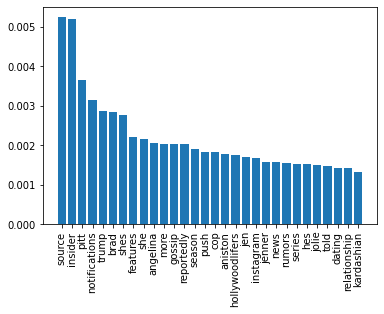

In [51]:
# find out what the model uses to predict
plt.bar([i[0] for i in get_importances[:30]],height=[i[1] for i in get_importances[:30]])
plt.xticks(rotation=90)
plt.show()

# Not bad for a first model? 

lets try to do better

# Stemming 
* Simple heurestic to chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
* Alternative (possible, not done) -> Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma 


language 
languages 
-> language
language -> languag
languages -> languag
time -> tim
timing -> tim

In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def lemmatizer(clean_data):
    # Create a stemmer object
    lemmatizer = WordNetLemmatizer()
    stemmed_data = [] # List for storing the stemmed data
    for data in clean_data:
        stemmed_text = [lemmatizer.lemmatize(word) for word in data] # Stem the words
        stemmed_data.append(stemmed_text) # Append the stemmed text
    return stemmed_data

In [57]:
clean_data = clean_func_v2(sample)
lemmatizer(clean_data)

[['much',
  'spend',
  'actual',
  'home',
  'well',
  'miranda',
  'kerr',
  'already',
  'spent',
  'much',
  'nursery',
  'unborn',
  'child',
  'according',
  'new',
  'report',
  'kento',
  'narafuture',
  'imagewenncom',
  'source',
  'told',
  'life',
  '',
  'style',
  'model',
  'husband',
  'snapchat',
  'ceo',
  'evan',
  'spiegel',
  'already',
  'dropped',
  '$250000',
  'nursery',
  'insider',
  'tell',
  'mag',
  'couple',
  'super',
  'excited',
  'welcoming',
  'child',
  'life',
  'adding',
  'baby',
  'nursery',
  'contains',
  'custommade',
  'crib',
  'walkin',
  'closet',
  'filled',
  'designer',
  'baby',
  'clothes',
  'dior',
  'stella',
  'mccartney',
  'ralph',
  'lauren',
  'she',
  'holding',
  'back',
  'come',
  'giving',
  'newborn',
  'best',
  'best',
  'source',
  'said',
  'rex',
  'usa',
  'nov',
  '15',
  'model',
  'rep',
  'confirmed',
  'husband',
  '7',
  'month',
  'expecting',
  'medium',
  'outlet',
  'reported',
  'miranda',
  'pregnant',


# tf-idf
* TF-IDF stands for Term Frequency Inverse Document Frequency of records. 
* It is defined as the calculation of how relevant a word in a series or corpus is to a text. 
* The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set)


In [58]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_data_v2(data):
    """
    because the random forest model from sklearn (most popular classical ML framework in python) takes in a vector,
    we transform each sentence into a vector where each variable represents the count of one word
    """
    tokenised_data = tokenizer(data)
    
    clean_data = clean_func_v2(tokenised_data)
        

    stemmed_data = lemmatizer(clean_data)

    # Flatten the stemmed data

    updated_data = []
    for data in stemmed_data:
        updated_data.append(" ".join(data))

    # 4. tfidf vectorizer --> Term Frequency Inverse Document Frequency
    # TFID Vector object
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(updated_data)

    return tfidf_matrix, tfidf

In [59]:
rf = RandomForestClassifier(random_state=2021)
model, metrics, vectorizer = train_model_get_score(data, preprocess=preprocess_data_v2,model=rf,metrics=compute_metrics)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       581
           1       0.88      0.56      0.68       417

    accuracy                           0.78       998
   macro avg       0.81      0.75      0.76       998
weighted avg       0.80      0.78      0.77       998



In [60]:
metrics

Accuracy Score
0        0.782565

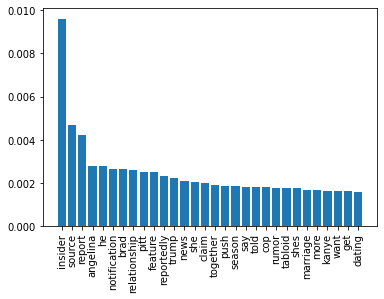

In [61]:
get_importances = []
for feature, importance in zip(vectorizer.get_feature_names(), model.feature_importances_):
    get_importances.append((feature, importance))
get_importances.sort(key=lambda x: x[1],reverse=True)
# find out what the model uses to predict
plt.bar([i[0] for i in get_importances[:30]],height=[i[1] for i in get_importances[:30]])
plt.xticks(rotation=90)
plt.show()

# Not chasing down the rabbit hole - lets try to augment our model
* so far we've been representing words as a one-hot vector
* unfortunately, that means our model is trying to memorise words, and doesn't really understand what they mean
* How do we "represent" the words better?
* Enter - encoding vectors
* https://nlp.stanford.edu/projects/glove/

## Aside on production level NLP with spaCy
* spacy -> ML engineering level 
* https://spacy.io/usage
* good integration with huggingface (transformer models)


In [62]:
!pip install spacy==2.2.4
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [63]:
from sklearn.base import TransformerMixin

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import string
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import spacy

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

import numpy as np

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

# Logistic Regression Classifier
classifier = RandomForestClassifier()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                ('vectorizer', bow_vector),
                ('classifier', classifier)])

X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state = 42)

# fit the model
pipe.fit(X_train, y_train)

# Compute the Logistic Regression Metrics
model_metrics =  compute_metrics(X_test, y_test, pipe)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       581
           1       0.88      0.55      0.68       417

    accuracy                           0.78       998
   macro avg       0.81      0.75      0.76       998
weighted avg       0.80      0.78      0.77       998



In [67]:
model_metrics

Accuracy Score
0        0.780561

# Final sharing - Things we could have done, but didn't
* Transformers
* Sentiments can be used to augment the model, but just a flavour here
* Hyperparameter tuning

## Transformers, encoding, and embeddings
* Interactive analysis of transformer models - https://nlp.seas.harvard.edu/2018/04/03/attention.html 
* Some code written below, but more thought needs to be put into -> what models should be used? what signals can be extracted?
* hyperparameter tuning much more important for deep neural nets

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
!pip install spacy==2.2.4 torch==1.9.0
!pip install spacy-transformers==0.5.3
!python3 -m spacy download en_trf_bertbaseuncased_lg

In [ ]:
# prepare training data for transformers 
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state = 42)

processed_train = []
for sentence,val in zip(X_train.values,y_train.values):
    processed_train.append((sentence,{"cats": {"POSITIVE": float(val), "NEGATIVE": 1-(float(val))}}))

In [ ]:
data

In [ ]:
# run this in jupyter 
import spacy
from spacy.util import minibatch
import random
import torch

is_using_gpu = spacy.prefer_gpu()
if is_using_gpu:
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
    
nlp = spacy.load("en_trf_bertbaseuncased_lg")
print(nlp.pipe_names) # ["sentencizer", "trf_wordpiecer", "trf_tok2vec"]
textcat = nlp.create_pipe("trf_textcat", config={"exclusive_classes": True})
for label in ("POSITIVE", "NEGATIVE"):
    textcat.add_label(label)
nlp.add_pipe(textcat)

optimizer = nlp.resume_training()
for i in range(10):
    random.shuffle(processed_train)
    losses = {}
    for batch in minibatch(processed_train, size=8):
        texts, cats = zip(*batch)
        nlp.update(texts, cats, sgd=optimizer, losses=losses)
    print(i, losses)

Sentiment analysis
* Complex engines (BERT/Transformer based) - spacy
* Simpler engines (rules based) - textblob, vader

In [64]:
!pip install textblob

In [66]:
from textblob import TextBlob

text = '''
The absolute threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment)


Sentiment(polarity=0.07999999999999999, subjectivity=0.7649999999999999)
Sentiment(polarity=-0.34166666666666673, subjectivity=0.7666666666666666)
